## 🧬 Problem Statement

### **Title:**  
**"Simulating Evolutionary Adaptation in Seahorses and Pipefishes Using Genetic Algorithms"**

### **Background:**  
In the natural world, species evolve over generations by adapting traits that increase their survival and reproductive success. Evolutionary Computing, particularly Genetic Algorithms (GA), offers a computational way to simulate this process and study how traits such as brain weight and body length evolve over time under specific selection pressures. Seahorses and pipefishes, known for their unique sexual dimorphism and habitat-based adaptations, provide an ideal case for such a simulation.

### **Objective:**  
To simulate the evolutionary trajectory of **seahorses** and **pipefishes** over multiple generations using **Genetic Algorithms**, analyzing how key traits — *brain weight* and *body length* — evolve under biologically-inspired constraints and selection mechanisms.

### **Key Goals:**

1. **Design and implement** a GA framework to simulate trait evolution in each species.
2. **Apply biologically meaningful constraints**, such as maximum and minimum values for traits.
3. **Evaluate the effect** of different genetic operators like:
   - Arithmetic & Simulated Binary Crossover  
   - Gaussian & Non-Uniform Mutation
4. **Visualize the evolutionary trends** in brain weight and body length across generations.
5. **Compare adaptive trends** between seahorses and pipefishes to identify species-specific evolutionary patterns.

### **Constraints:**
- Brain Weight (mg) and Length (mm) must stay within species-specific biological ranges:
  - **Seahorses:** Length ≤ 200 mm  
  - **Pipefishes:** Length ≤ 450 mm


### 🧪 Research Questions and Their Answers


#### **Research Question 1:**  
**How do brain weight and body length evolve under genetic selection in seahorses and pipefishes?**

**Answer:**  
Over successive generations, both brain weight and body length show directional changes influenced by the fitness function. For seahorses, traits stabilize within an optimal range due to strict length constraints (≤ 300 mm). Pipefishes show a slightly broader variation because of their higher upper limit (≤ 450 mm). The traits tend to converge to values that maximize fitness, simulating natural adaptation under evolutionary pressure.

---

#### **Research Question 2:**  
**What role do different crossover and mutation strategies play in accelerating or stabilizing evolution?**

**Answer:**  
- **Arithmetic Crossover (AC)** produces averaged offspring traits, leading to smoother evolution and gradual convergence.  
- **Simulated Binary Crossover (SBX)** maintains diversity by introducing broader variability in offspring, helping avoid premature convergence.  
- **Gaussian Mutation (GM)** introduces small, normally-distributed perturbations in traits, enabling fine-tuned exploration.  
- **Non-Uniform Mutation (NUM)** allows larger changes early on, gradually reducing mutation range as generations progress — mimicking natural refinement.  

Together, these strategies enable a balance between **exploration (diversity)** and **exploitation (refinement)** in trait evolution.

---

#### **Research Question 3:**  
**How does sexual dimorphism (via sex-based pairing) influence offspring trait distribution?**

**Answer:**  
By enforcing **male-female pairings**, the model respects biological realism and increases genetic diversity in the offspring. It prevents biased recombination (e.g., male-male or female-female) and ensures that traits from both sexes are mixed in each generation. This leads to more **heterogeneous trait combinations**, improving the quality of evolution and potentially avoiding local optima.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = "brain_mass_body_length.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

In [ ]:
le = LabelEncoder()
df["Sex_Encoded"] = le.fit_transform(df["Sex"])

In [ ]:
# Classify each row based on the species name
seahorses_df = df[df["Species"].str.contains("Hippocampus")].copy()
pipefishes_df = df[~df["Species"].str.contains("Hippocampus")].copy()

In [ ]:
encoded_seahorses_df = seahorses_df.copy()
encoded_pipefishes_df = pipefishes_df.copy()

### Basic Visualization of Seahorse Dataset

This section provides an initial exploratory analysis of the **seahorse dataset** using histograms and scatter plots. The goal is to understand the distribution and relationship between key biological traits.


In [ ]:
encoded_seahorses_df.head()

,Species,Sex,Length (mm),Brain weight (mg),Preservative,Location,Sex_Encoded
123,Hippocampus abdominalis,m,135.0,12.6,Formalin,Australia,1
124,Hippocampus abdominalis,f,184.5,15.8,Formalin,Australia,0
125,Hippocampus abdominalis,f,146.7,10.1,Formalin,Australia,0
126,Hippocampus abdominalis,f,156.6,20.2,Formalin,Australia,0
127,Hippocampus abdominalis,m,151.0,10.9,Formalin,Australia,1


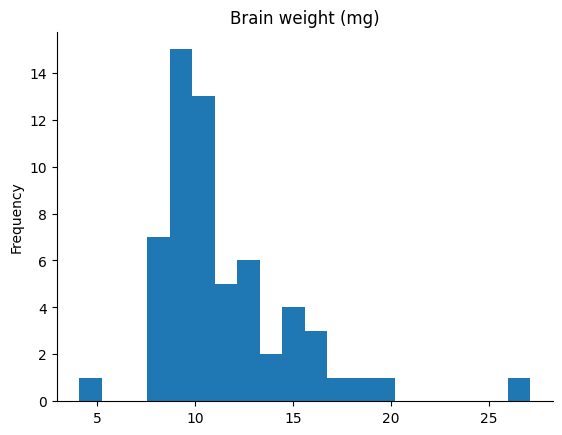

In [ ]:
encoded_seahorses_df['Brain weight (mg)'].plot(kind='hist', bins=20, title='Brain weight (mg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

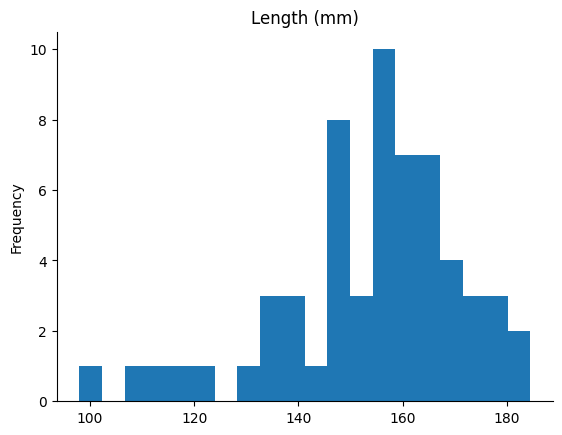

In [ ]:
encoded_seahorses_df['Length (mm)'].plot(kind='hist', bins=20, title='Length (mm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

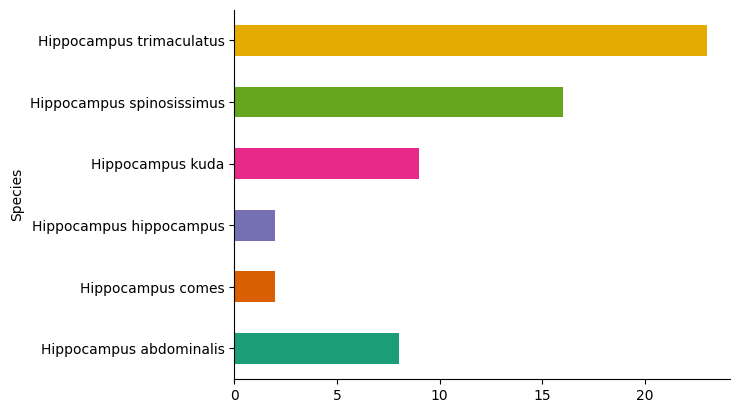

In [ ]:
encoded_seahorses_df.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Basic Visualization of Pipefish Dataset

This section provides an initial exploratory analysis of the **pipefish dataset** using histograms and scatter plots. The goal is to understand the distribution and relationship between key biological traits.


In [ ]:
encoded_pipefishes_df.head()

,Species,Sex,Length (mm),Brain weight (mg),Preservative,Location,Sex_Encoded
0,Corythoichthys haematopterus,f,112.6,3.27,Formalin,Japan,0
1,Corythoichthys haematopterus,f,115.0,3.97,Formalin,Japan,0
2,Corythoichthys haematopterus,f,121.4,4.83,Formalin,Japan,0
3,Corythoichthys haematopterus,f,122.4,4.09,Formalin,Japan,0
4,Corythoichthys haematopterus,f,128.0,4.29,Formalin,Japan,0


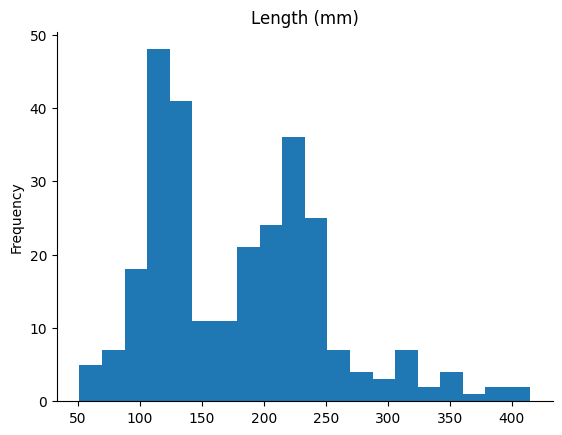

In [ ]:
encoded_pipefishes_df['Length (mm)'].plot(kind='hist', bins=20, title='Length (mm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

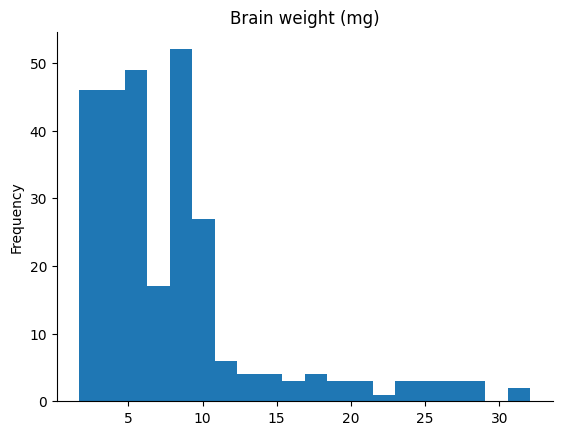

In [ ]:
encoded_pipefishes_df['Brain weight (mg)'].plot(kind='hist', bins=20, title='Brain weight (mg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

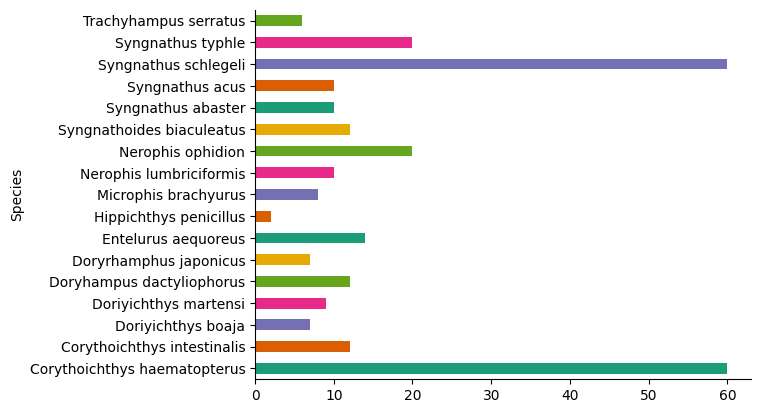

In [ ]:
encoded_pipefishes_df.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Dataset Size and Chosen Population Parameters

Before implementing the evolutionary algorithms, we begin by understanding the size of our datasets and deciding on the population sizes to be used in simulations.

---

#### Dataset Overview

- **Total number of Seahorses**: `60`  
- **Total number of Pipefishes**: `279`  

These represent the full sets of encoded and preprocessed biological samples available for our evolutionary study.

---

#### Population Size for Evolutionary Simulation

To balance computational efficiency and evolutionary diversity, we use the following subset sizes for the genetic algorithm:

- **Seahorse Population Size**: `35` individuals  
- **Pipefish Population Size**: `150` individuals  

These selected sample sizes serve as the **initial population** for our Genetic Algorithm (GA), ensuring a representative sample while avoiding overfitting or computational overhead. These individuals are subjected to selection, crossover, and mutation across generations.


### Descriptive Statistics of Brain weight and Length of both of the Datas

In [ ]:
encoded_seahorses_df['Brain weight (mg)'].describe()

,Brain weight (mg)
count,60.000000
mean,11.614000
std,3.577402
min,4.110000
25%,9.265000
50%,10.765000
75%,12.737500
max,27.100000


In [ ]:
encoded_seahorses_df['Length (mm)'].describe()

,Length (mm)
count,60.000000
mean,154.045000
std,18.043464
min,98.000000
25%,146.525000
50%,156.350000
75%,165.250000
max,184.500000


In [ ]:
encoded_pipefishes_df['Brain weight (mg)'].describe()

,Brain weight (mg)
count,279.000000
mean,7.971183
std,5.888526
min,1.700000
25%,4.190000
50%,6.220000
75%,9.285000
max,32.100000


In [ ]:
encoded_pipefishes_df['Length (mm)'].describe()

,Length (mm)
count,279.000000
mean,180.202151
std,70.621404
min,51.500000
25%,122.000000
50%,175.000000
75%,226.500000
max,415.000000


### Fitness Function

The fitness function evaluates how well an individual seahorse/pipefish fits within the population and how close it is to an "optimal" trait profile. It is designed to minimize both the deviation from population traits and the distance from predefined ideal trait values.

#### Components:

1. **Trait Difference from Population Mean**  
   - The function calculates the mean brain weight and length across the entire seahorse population.
   - Then, it computes the absolute difference between the individual's traits and these population means.
   - This component is weighted at **30%** (`weight_trait_diff = 0.3`), meaning it's the more significant factor in the fitness calculation.

2. **Distance from Optimal Traits**  
   - The optimal traits for seahore as:  
     - Brain weight: **12.7 mg**  
     - Length: **165.2 mm**
  - The optimal traits for pipefish as:  
     - Brain weight: **9.2 mg**  
     - Length: **226.5 mm**
   - The function calculates the absolute difference between the individual's traits and these ideal values.
   - This part is given a **70%** weight (`weight_optimal_distance = 0.7`).

3. **Final Fitness Score**  
   - The total weighted score is divided by 10 to normalize the value.

#### Goal:

Lower fitness scores indicate better individuals. A seahorse/pipefish with traits closer to both the population mean and the optimal traits will have a lower fitness value and is considered more fit.

#### **Why are we doing this?**

- The goal of a genetic algorithm is to evolve a population of individuals toward a better solution over time.
- In our case, “better” means a seahorse/pipefish whose traits are biologically desirable and also consistent with the natural distribution in the population.
- By using both the population mean and optimal traits:
  - We maintain **biological realism** (stay close to what's naturally observed),
  - While also encouraging **evolution toward ideal traits** (which may represent stronger or more adaptive individuals).
- A lower fitness score indicates a more favorable individual, guiding the selection, crossover, and mutation processes of the genetic algorithm in each generation.


In [ ]:
def fitness_sh(individual):
    weight_trait_diff = 0.3
    weight_optimal_distance = 0.7
    population_mean = encoded_seahorses_df[["Brain weight (mg)", "Length (mm)"]].mean()
    trait_diff = np.sum(np.abs(individual[["Brain weight (mg)", "Length (mm)"]] - population_mean))
    optimal_traits = np.array([12.7, 165.2])
    optimal_dist = np.sum(np.abs(individual[["Brain weight (mg)", "Length (mm)"]] - optimal_traits))
    return ((weight_trait_diff * trait_diff) + (weight_optimal_distance * optimal_dist)) / 10

In [ ]:
def fitness_pf(individual):
    weight_trait_diff = 0.3
    weight_optimal_distance = 0.7
    population_mean = encoded_pipefishes_df[["Brain weight (mg)", "Length (mm)"]].mean()
    trait_diff = np.sum(np.abs(individual[["Brain weight (mg)", "Length (mm)"]] - population_mean))
    optimal_traits = np.array([9.2, 226.5])
    optimal_dist = np.sum(np.abs(individual[["Brain weight (mg)", "Length (mm)"]] - optimal_traits))
    return ((weight_trait_diff * trait_diff) + (weight_optimal_distance * optimal_dist)) / 10

In [ ]:
# Apply fitness
encoded_seahorses_df["Fitness"] = encoded_seahorses_df.apply(fitness_sh, axis=1)
encoded_pipefishes_df["Fitness"] = encoded_pipefishes_df.apply(fitness_pf, axis=1)

### Performance of Brain weight and Length over Fitness for seahorse/pipefish

In [ ]:
encoded_seahorses_df.head()

,Species,Sex,Length (mm),Brain weight (mg),Preservative,Location,Sex_Encoded,Fitness
123,Hippocampus abdominalis,m,135.0,12.6,Formalin,Australia,1,2.72193
124,Hippocampus abdominalis,f,184.5,15.8,Formalin,Australia,0,2.60723
125,Hippocampus abdominalis,f,146.7,10.1,Formalin,Australia,0,1.74277
126,Hippocampus abdominalis,f,156.6,20.2,Formalin,Australia,0,1.46123
127,Hippocampus abdominalis,m,151.0,10.9,Formalin,Australia,1,1.23277


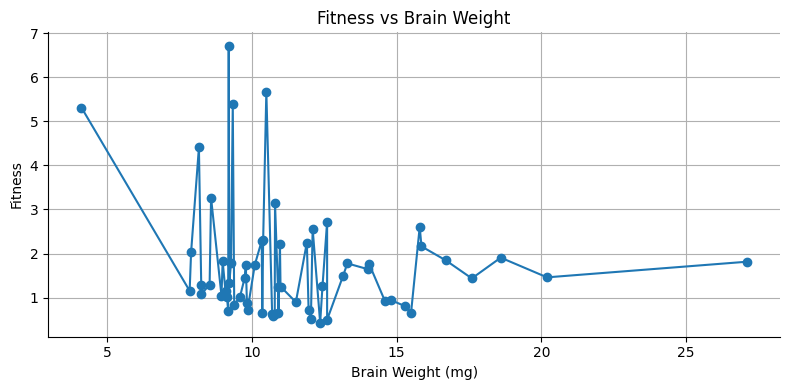

In [ ]:
#seahorses
encoded_seahorses_df_sorted = encoded_seahorses_df.sort_values(by="Brain weight (mg)")
plt.figure(figsize=(8, 4))
plt.plot(encoded_seahorses_df_sorted["Brain weight (mg)"], encoded_seahorses_df_sorted["Fitness"], marker='o')
plt.title("Fitness vs Brain Weight")
plt.xlabel("Brain Weight (mg)")
plt.ylabel("Fitness")
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

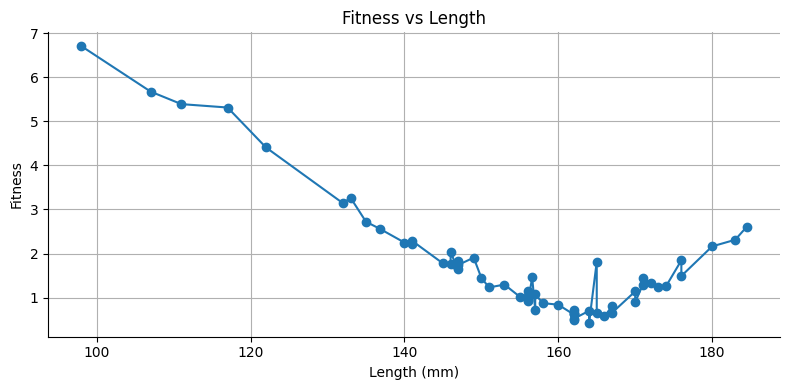

In [ ]:
#seahorses
encoded_seahorses_df_sorted = encoded_seahorses_df.sort_values(by="Length (mm)")
plt.figure(figsize=(8, 4))
plt.plot(encoded_seahorses_df_sorted["Length (mm)"], encoded_seahorses_df_sorted["Fitness"], marker='o')
plt.title("Fitness vs Length")
plt.xlabel("Length (mm)")
plt.ylabel("Fitness")
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
encoded_pipefishes_df.head()

,Species,Sex,Length (mm),Brain weight (mg),Preservative,Location,Sex_Encoded,Fitness
0,Corythoichthys haematopterus,f,112.6,3.27,Formalin,Japan,0,10.5572
1,Corythoichthys haematopterus,f,115.0,3.97,Formalin,Japan,0,10.2472
2,Corythoichthys haematopterus,f,121.4,4.83,Formalin,Japan,0,9.5212
3,Corythoichthys haematopterus,f,122.4,4.09,Formalin,Japan,0,9.4952
4,Corythoichthys haematopterus,f,128.0,4.29,Formalin,Japan,0,8.9152


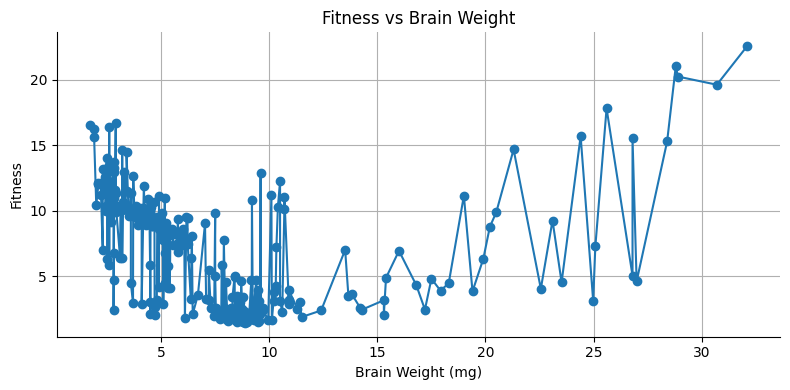

In [ ]:
#pipefish
encoded_pipefishes_df_sorted = encoded_pipefishes_df.sort_values(by="Brain weight (mg)")
plt.figure(figsize=(8, 4))
plt.plot(encoded_pipefishes_df_sorted["Brain weight (mg)"], encoded_pipefishes_df_sorted["Fitness"], marker='o')
plt.title("Fitness vs Brain Weight")
plt.xlabel("Brain Weight (mg)")
plt.ylabel("Fitness")
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

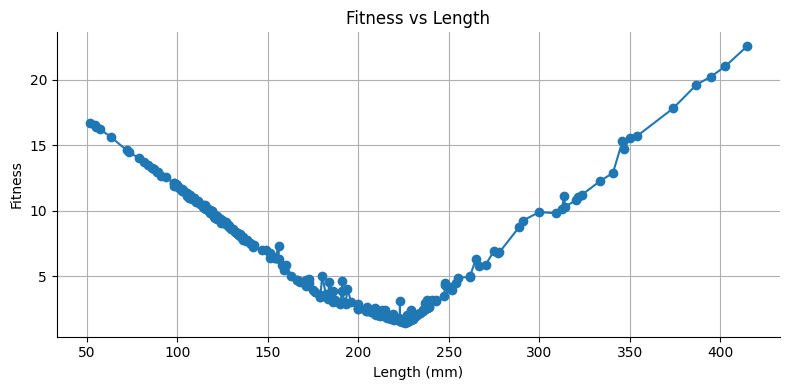

In [ ]:
#pipefish
encoded_pipefishes_df_sorted = encoded_pipefishes_df.sort_values(by="Length (mm)")
plt.figure(figsize=(8, 4))
plt.plot(encoded_pipefishes_df_sorted["Length (mm)"], encoded_pipefishes_df_sorted["Fitness"], marker='o')
plt.title("Fitness vs Length")
plt.xlabel("Length (mm)")
plt.ylabel("Fitness")
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

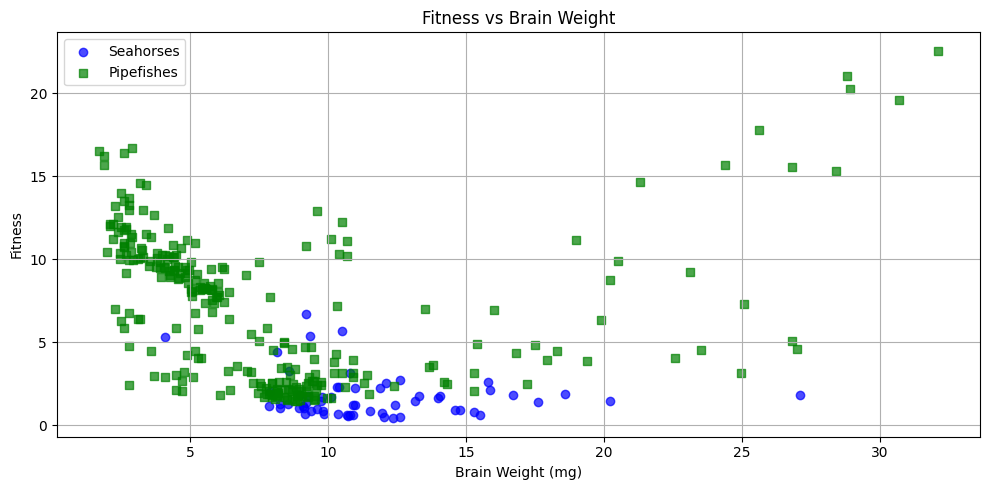

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(
    encoded_seahorses_df["Brain weight (mg)"],
    encoded_seahorses_df["Fitness"],
    label="Seahorses",
    alpha=0.7,
    color='blue',
    marker='o'
)
plt.scatter(
    encoded_pipefishes_df["Brain weight (mg)"],
    encoded_pipefishes_df["Fitness"],
    label="Pipefishes",
    alpha=0.7,
    color='green',
    marker='s'
)
plt.title("Fitness vs Brain Weight")
plt.xlabel("Brain Weight (mg)")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

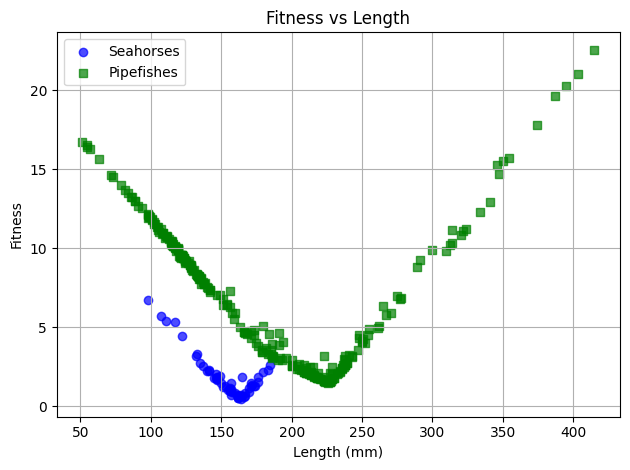

In [ ]:
plt.scatter(
    encoded_seahorses_df["Length (mm)"],
    encoded_seahorses_df["Fitness"],
    label="Seahorses",
    alpha=0.7,
    color='blue',
    marker='o'
)
plt.scatter(
    encoded_pipefishes_df["Length (mm)"],
    encoded_pipefishes_df["Fitness"],
    label="Pipefishes",
    alpha=0.7,
    color='green',
    marker='s'
)
plt.title("Fitness vs Length")
plt.xlabel("Length (mm)")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Parent Selection Strategies

In evolutionary algorithms, **parent selection** determines which individuals from the current population will contribute to the next generation. Two commonly used strategies in this study are:

---

#### 1. Tournament Selection

- **How it works**: A subset of individuals (a "tournament") is randomly chosen from the population. The individual with the best fitness among them is selected as a parent.
- **Why it's useful**:
  - It introduces **selection pressure**, ensuring that stronger individuals have a higher chance of reproducing.
  - It’s **easy to implement** and doesn't require fitness normalization.
- **Customization**: The size of the tournament controls the pressure — larger tournaments favor stronger individuals more strongly.

---

#### 2. Boltzmann Selection

- **How it works**: Selection probability is based on a **Boltzmann distribution** that incorporates a "temperature" parameter. Individuals with better fitness have a higher probability of being selected, but poorer individuals still have a small chance — especially at higher temperatures.
- **Why it's useful**:
  - Encourages **exploration** in early generations by allowing diversity.
  - As temperature decreases over generations, the algorithm gradually shifts toward **exploitation**, focusing on the best candidates.
- **Analogy**: Inspired by **simulated annealing**, where a system transitions from randomness to stability.

---

### Why use both?

Using both Tournament and Boltzmann selection allows a balance between **exploitation (Tournament)** and **exploration (Boltzmann)**, improving the chances of finding optimal solutions while avoiding premature convergence.


*** For Seahorse***

**u,lambda**

**Notation:**

μ (mu): Number of parents

λ (lambda): Number of offspring (typically λ > μ)

**Process:**

Only the offspring (λ individuals) are considered for selection.

The best μ individuals from the λ offspring are chosen to form the next generation.

Parents are not preserved; survival is based only on the quality of the offspring.

**Pros:**

Encourages exploration and introduces strong selection pressure.

Helps prevent premature convergence by not letting parents dominate.

def tournament_selection_sh(population, num_parents, tournament_size=3):
    selected = []
    for _ in range(num_parents):
        tournament = population.sample(n=min(tournament_size, len(population)), replace=True)
        winner = tournament.loc[tournament["Fitness"].idxmax()]
        selected.append(winner)
    return pd.DataFrame(selected).reset_index(drop=True)

In [ ]:
def tournament_selection_sh(df, num_parents, tournament_size=3):
    selected_parents = []

    for _ in range(num_parents):
        # Sample individuals without worrying about index alignment
        candidates = df.sample(n=tournament_size, replace=False).copy()
        winner_idx = candidates['Fitness'].idxmin()
        winner = df.loc[winner_idx].copy()
        selected_parents.append(winner)

    # Create a new DataFrame from selected Series objects
    selected_df = pd.DataFrame(selected_parents).reset_index(drop=True)
    return selected_df

In [ ]:
def boltzmann_selection_sh(population, num_parents, temperature):
    exp_fitness = np.exp(population["Fitness"] / temperature)
    probabilities = exp_fitness / np.sum(exp_fitness)
    selected_indices = np.random.choice(population.index, size=num_parents, p=probabilities, replace=True)
    return population.loc[selected_indices]

**For Pipefish**

def tournament_selection_pf(population, num_parents, tournament_size=3):
  selected = []
  for _ in range(num_parents):
    tournament = population.sample(n=min(tournament_size, len(population)), replace=True)
    winner = tournament.loc[tournament["Fitness"].idxmax()]
    selected.append(winner)
  return pd.DataFrame(selected).reset_index(drop=True)

In [ ]:
def tournament_selection_pf(df, num_parents, tournament_size=3):
    selected_parents = []

    for _ in range(num_parents):
        # Randomly select candidates for the tournament
        candidates = df.sample(n=tournament_size, replace=False).copy()
        winner_idx = candidates['Fitness'].idxmin()
        winner = df.loc[winner_idx].copy()
        selected_parents.append(winner)

    # Return new DataFrame of selected parents
    selected_df = pd.DataFrame(selected_parents).reset_index(drop=True)
    return selected_df


In [ ]:
def boltzmann_selection_pf(population, num_parents, temperature):
    exp_fitness = np.exp(population["Fitness"] / temperature)
    probabilities = exp_fitness / np.sum(exp_fitness)
    selected_indices = np.random.choice(population.index, size=num_parents, p=probabilities, replace=True)
    return population.loc[selected_indices]

**Applying Fitness**

In [ ]:
tournament_selected_seahorses = tournament_selection_sh(encoded_seahorses_df, 35)
tournament_selected_pipefishes = tournament_selection_pf(encoded_pipefishes_df, 150)

In [ ]:
temp = 4
boltzmann_selected_seahorses = boltzmann_selection_sh(encoded_seahorses_df, 35, temp)
boltzmann_selected_pipefishes = boltzmann_selection_pf(encoded_pipefishes_df, 150, temp)

**Average Fitness**

In [ ]:
tournament_avg_fitness_sh = tournament_selected_seahorses["Fitness"].mean()
boltzmann_avg_fitness_sh = boltzmann_selected_seahorses["Fitness"].mean()
print(f"Tournament Selection Avg Fitness: {tournament_avg_fitness_sh:.4f}")
print(f"Boltzmann Selection Avg Fitness: {boltzmann_avg_fitness_sh:.4f}")

Tournament Selection Avg Fitness: 0.9305
Boltzmann Selection Avg Fitness: 2.5632


In [ ]:
tournament_avg_fitness_pf = tournament_selected_pipefishes["Fitness"].mean()
boltzmann_avg_fitness_pf = boltzmann_selected_pipefishes["Fitness"].mean()
print(f"Tournament Selection Avg Fitness: {tournament_avg_fitness_pf:.4f}")
print(f"Boltzmann Selection Avg Fitness: {boltzmann_avg_fitness_pf:.4f}")

Tournament Selection Avg Fitness: 3.7995
Boltzmann Selection Avg Fitness: 12.8129


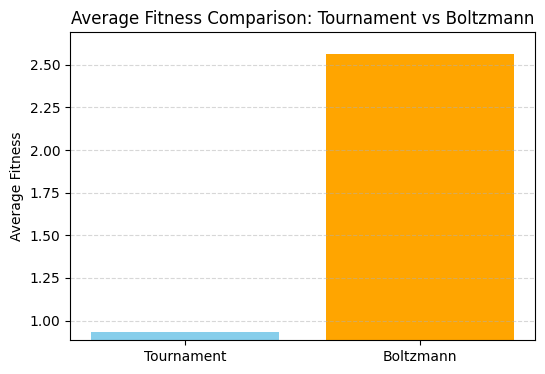

In [ ]:
methods = ['Tournament', 'Boltzmann']
avg_fitness_values = [tournament_avg_fitness_sh, boltzmann_avg_fitness_sh]

plt.figure(figsize=(6, 4))
plt.bar(methods, avg_fitness_values, color=['skyblue', 'orange'])
plt.title('Average Fitness Comparison: Tournament vs Boltzmann')
plt.ylabel('Average Fitness')
plt.ylim(min(avg_fitness_values)*0.95, max(avg_fitness_values)*1.05)  # some buffer for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

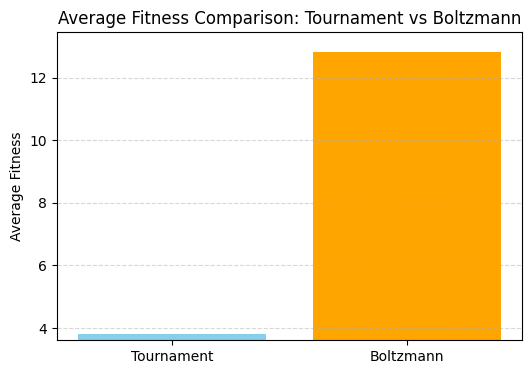

In [ ]:
methods = ['Tournament', 'Boltzmann']
avg_fitness_values = [tournament_avg_fitness_pf, boltzmann_avg_fitness_pf]

plt.figure(figsize=(6, 4))
plt.bar(methods, avg_fitness_values, color=['skyblue', 'orange'])
plt.title('Average Fitness Comparison: Tournament vs Boltzmann')
plt.ylabel('Average Fitness')
plt.ylim(min(avg_fitness_values)*0.95, max(avg_fitness_values)*1.05)  # some buffer for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Crossover and Mutation

In Genetic Algorithms (GAs), **crossover** and **mutation** are two key operators used to create diversity and guide the population toward optimal solutions. This study uses two techniques each for recombination and mutation:

---

#### 🔗 Crossover

**1. Arithmetic Crossover**
- Blends parent traits using a weighted average.
- Produces smooth and gradual transitions in traits across generations.
- Helps maintain biological realism when combining continuous-valued traits (like brain weight and body length).

**2. Simulated Binary Crossover (SBX)**
- Mimics the working of single-point crossover used in binary strings, but works for real-valued representations.
- Generates offspring closer to the parents or spread across their range based on a distribution index.
- Encourages **structured diversity**, making it useful in complex search spaces.

---

#### Mutation

**1. Gaussian Mutation**
- Introduces small, normally-distributed variations to traits.
- Mimics natural, random genetic drift.
- Ensures controlled changes without drastically altering the offspring.

**2. Non-Uniform Mutation**
- Alters genes with varying intensity based on the current generation.
- Large mutations occur in early generations for **exploration**.
- Smaller, fine-tuned mutations occur in later generations for **exploitation**.
- Adaptive in nature, allowing convergence to optimal traits over time.

---

### Why These Methods?

Combining smooth crossover (Arithmetic), structured diversity (SBX), controlled randomness (Gaussian), and adaptive mutation (Non-Uniform) ensures a balanced exploration-exploitation trade-off throughout the evolutionary process.

In [ ]:
def arithmetic_crossover(p1, p2, alpha=None):
    if alpha is None:
        alpha = np.random.uniform(0, 1)
    c1 = alpha * p1 + (1 - alpha) * p2
    c2 = (1 - alpha) * p1 + alpha * p2
    return c1, c2

In [ ]:
#  small eta --> more exploration
# large eta --> keeps offsprings closer to parents

def sbx_crossover(p1, p2, eta=2): # eta--> distribution index that controls exploration
    u = np.random.rand() #decides how far offspring moves from parents
    beta = (2 * u) ** (1 / (eta + 1)) if u <= 0.5 else (1 / (2 * (1 - u))) ** (1 / (eta + 1))  # control deviation from parents
    c1 = 0.5 * ((1 + beta) * p1 + (1 - beta) * p2)
    c2 = 0.5 * ((1 - beta) * p1 + (1 + beta) * p2)
    return c1, c2

In [ ]:
def gaussian_mutation(ind, strength=0.1):
    return ind + np.random.normal(0, strength, size=ind.shape)

In [ ]:
def non_uniform_mutation(ind, generation, max_generations, b=5):
    r = np.random.rand(*ind.shape)
    t = generation / max_generations
    delta = ind * (1 - r ** ((1 - t) ** b))
    return ind + delta

In [ ]:
def evolve_population(pop, crosso, mutat, species="seahorse"):
    mutation_rate = 0.3
    crossover_rate = 0.6
    generation = 1
    max_generations = 10
    new_pop = []

    # Set biological bounds based on species
    min_brain_weight  = 0.1  # mg
    max_brain_weight = 45 if species == "seahorse" else 48  # mg
    min_length = 1 # mm
    max_length = 200 if species == "seahorse" else 450  # mm

    males = pop[pop["Sex_Encoded"] == 1]
    females = pop[pop["Sex_Encoded"] == 0]

    min_len = min(len(males), len(females))
    for _ in range(min_len):
        p1 = males.sample(1).iloc[0][["Brain weight (mg)", "Length (mm)"]].values.astype(float)
        p2 = females.sample(1).iloc[0][["Brain weight (mg)", "Length (mm)"]].values.astype(float)

        if np.random.rand() < crossover_rate:
            if crosso == "ac":
                child1, child2 = arithmetic_crossover(p1, p2)
            elif crosso == "sbx":
                child1, child2 = sbx_crossover(p1, p2)
            else:
                print("Wrong crossover function, choose between 'ac' or 'sbx'")
                break
        else:
            child1, child2 = p1, p2

        x = np.random.rand()

        if x < mutation_rate:
            if mutat == "gm":
                child1 = gaussian_mutation(child1)
            elif mutat == "num":
                child1 = non_uniform_mutation(child1, generation, max_generations)

        if x < mutation_rate:
            if mutat == "gm":
                child2 = gaussian_mutation(child2)
            elif mutat == "num":
                child2 = non_uniform_mutation(child2, generation, max_generations)

        # Clip values within species-specific bounds
        child1 = np.clip(child1, [min_brain_weight, min_length], [max_brain_weight, max_length])
        child2 = np.clip(child2, [min_brain_weight, min_length], [max_brain_weight, max_length])

        new_pop.extend([child1, child2])

    # Return DataFrame with proper columns
    offspring_df = pd.DataFrame(new_pop, columns=["Brain weight (mg)", "Length (mm)"])
    offspring_df["Sex_Encoded"] = np.random.choice([0, 1], size=len(offspring_df))

    return offspring_df

In [ ]:
# Random population initialization
initial_seahorses = encoded_seahorses_df.sample(n=35, random_state=42)
initial_pipefishes = encoded_pipefishes_df.sample(n=150, random_state=42)

### 📊 Comparison of Evolutionary Strategies

To understand which evolutionary configuration performs better, it is essential to **systematically compare** the models used.

Each configuration may use different:

- **Parent Selection Techniques**: Tournament or Boltzmann
- **Crossover Methods**: Arithmetic Crossover (AC) or Simulated Binary Crossover (SBX)
- **Mutation Strategies**: Gaussian Mutation (GM) or Non-Uniform Mutation (NUM)

---


### Goal of Comparison

By running simulations for each configuration and comparing the results, we aim to identify which combination of selection, crossover, and mutation:

- Produces better-adapted populations,
- Evolves towards optimal biological traits,
- Maintains stability and diversity,
- And ultimately provides **the most effective evolutionary strategy** for our dataset (seahorses and pipefishes).

This comparison provides insights into how different evolutionary techniques influence the direction, quality, and robustness of species evolution in computational models.


In [ ]:
sh_offspring_1 = evolve_population(initial_seahorses, "ac", "gm")
pf_offspring_1 = evolve_population(initial_pipefishes,  "ac", "gm")

In [ ]:
sh_offspring_1

,Brain weight (mg),Length (mm),Sex_Encoded
0,7.850000,156.000000,0
1,14.000000,147.000000,0
2,10.501444,164.469663,0
3,10.848556,170.530337,0
4,11.183004,168.315019,1
5,11.256996,168.684981,1
6,12.600000,162.000000,1
7,15.860000,180.000000,1
8,16.549159,176.302427,1
9,10.534695,182.649937,1


In [ ]:
sh_offspring_1_df["Fitness"] =sh_offspring_1_df.apply(fitness_sh, axis=1)
pf_offspring_1_df["Fitness"] =pf_offspring_1_df.apply(fitness_sh, axis=1)

----

In [ ]:
sh_offspring_2 = evolve_population(initial_seahorses, "ac", "num")
pf_offspring_2 = evolve_population(initial_pipefishes,  "ac", "num")

In [ ]:
sh_offspring_2_df["Fitness"] =sh_offspring_2_df.apply(fitness_sh, axis=1)
pf_offspring_2_df["Fitness"] =pf_offspring_1_df.apply(fitness_sh, axis=1)

---

In [ ]:
sh_offspring_3 = evolve_population(initial_seahorses, "sbx", "gm")
pf_offspring_3 = evolve_population(initial_pipefishes,  "sbx", "gm")

In [ ]:
sh_offspring_3_df["Fitness"] =sh_offspring_3_df.apply(fitness_sh, axis=1)
pf_offspring_3_df["Fitness"] =pf_offspring_3_df.apply(fitness_sh, axis=1)

---

In [ ]:
sh_offspring_4 = evolve_population(initial_seahorses, "sbx", "num")
pf_offspring_4 = evolve_population(initial_pipefishes,  "sbx", "num")

In [ ]:
sh_offspring_4_df["Fitness"] =sh_offspring_4_df.apply(fitness_sh, axis=1)
pf_offspring_4_df["Fitness"] =pf_offspring_4_df.apply(fitness_sh, axis=1)

-------


In [ ]:
# --- Average fitness for each combo ---

# Seahorses
sh_avg_fitness = {
    "AC + GM": sh_offspring_1_df["Fitness"].mean(),
    "AC + NUM": sh_offspring_2_df["Fitness"].mean(),
    "SBX + GM": sh_offspring_3_df["Fitness"].mean(),
    "SBX + NUM": sh_offspring_4_df["Fitness"].mean(),
}

# Pipefishes
pf_avg_fitness = {
    "AC + GM": pf_offspring_1_df["Fitness"].mean(),
    "AC + NUM": pf_offspring_2_df["Fitness"].mean(),
    "SBX + GM": pf_offspring_3_df["Fitness"].mean(),
    "SBX + NUM": pf_offspring_4_df["Fitness"].mean(),
}

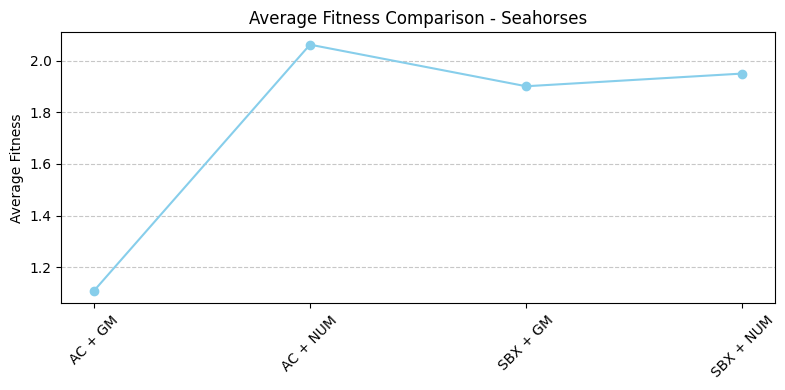

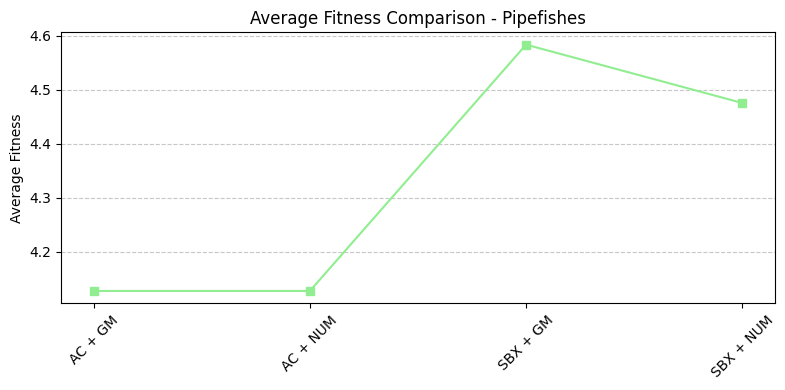

In [ ]:
# --- Plotting Seahorses (Line Graph) ---
plt.figure(figsize=(8, 4))
plt.plot(list(sh_avg_fitness.keys()), list(sh_avg_fitness.values()),
         marker='o', linestyle='-', color='skyblue', label="Seahorses")
plt.title("Average Fitness Comparison - Seahorses")
plt.ylabel("Average Fitness")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plotting Pipefishes (Line Graph) ---
plt.figure(figsize=(8, 4))
plt.plot(list(pf_avg_fitness.keys()), list(pf_avg_fitness.values()),
         marker='s', linestyle='-', color='lightgreen', label="Pipefishes")
plt.title("Average Fitness Comparison - Pipefishes")
plt.ylabel("Average Fitness")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🌱 Survivor Selection in Evolutionary Algorithms

**Survivor Selection** is a critical stage in Genetic Algorithms (GA) that determines which individuals from the current population and newly generated offspring will proceed to the next generation. The goal is to retain the best and most diverse individuals to drive evolution forward.

---

### Why is Survivor Selection Important?

1. **Maintains Population Quality**: It ensures that only the fittest or most promising individuals survive, improving the population over generations.
2. **Prevents Degradation**: Without proper selection, random or weak individuals may persist, reducing overall progress.
3. **Balances Exploration and Exploitation**:
   - Exploitation: Keeps the best-performing individuals.
   - Exploration: Allows room for genetic diversity from new offspring.

---

### Survivor Selection Strategies

In our project, we use the **(μ + λ) Elitism Strategy**, which works as follows:

- **Parents (μ)**: These are the individuals from the current generation.
- **Offspring (λ)**: These are the new individuals produced via crossover and mutation.
- **Elitism**: Combines both parents and offspring into one pool, evaluates their fitness, and selects the top `N` individuals based on fitness.

> This ensures that the best individuals, regardless of whether they are old or new, survive.

---

### 🔍 How It Works in Code

```python
combined_df = pd.concat([parents_df, offspring_df], ignore_index=True)
survivors = combined_df.sort_values(by="Fitness", ascending=True).head(num_survivors)


In [ ]:
# Survivor selection (μ + λ with elitism)
def survivor_selection_elitism_sh(parents_df, offspring_array, num_survivors):
    offspring_df = pd.DataFrame(offspring_array, columns=["Brain weight (mg)", "Length (mm)"])
    offspring_df["Sex_Encoded"] = np.random.choice([0, 1], size=len(offspring_df))
    offspring_df["Fitness"] = offspring_df.apply(lambda row: fitness_sh(row), axis=1)
    combined_df = pd.concat([parents_df[["Brain weight (mg)", "Length (mm)", "Sex_Encoded", "Fitness"]], offspring_df], ignore_index=True)
    survivors = combined_df.sort_values(by="Fitness", ascending=True).head(num_survivors)
    return survivors

In [ ]:
# Survivor selection (μ + λ with elitism)
def survivor_selection_elitism_pf(parents_df, offspring_array, num_survivors):
    offspring_df = pd.DataFrame(offspring_array, columns=["Brain weight (mg)", "Length (mm)"])
    offspring_df["Sex_Encoded"] = np.random.choice([0, 1], size=len(offspring_df))
    offspring_df["Fitness"] = offspring_df.apply(lambda row: fitness_pf(row), axis=1)
    combined_df = pd.concat([parents_df[["Brain weight (mg)", "Length (mm)", "Sex_Encoded", "Fitness"]], offspring_df], ignore_index=True)
    survivors = combined_df.sort_values(by="Fitness", ascending=True).head(num_survivors)
    return survivors

In [ ]:
# Survivor Selection
sh_survivors = survivor_selection_elitism_sh(initial_seahorses, sh_offspring_2_df, 48)
pf_survivors = survivor_selection_elitism_pf(initial_pipefishes, pf_offspring_4_df, 248)

###Repeat Evolutionary Cycle

Once all components of the Genetic Algorithm (selection, crossover, mutation, survivor selection) are defined, the final step is to **run the entire evolutionary cycle repeatedly** over a number of generations.

---

### What Happens in Each Generation?

1. **Fitness Evaluation**:
   - Every individual in the population is evaluated using a fitness function.
   - This helps determine how well-suited each individual is.

2. **Parent Selection**:
   - A subset of the best individuals is chosen to reproduce.
   - Methods like tournament selection or Boltzmann selection are typically used.

3. **Crossover & Mutation**:
   - Parents undergo recombination and mutation to create new offspring.
   - Helps in mixing genes and introducing diversity.

4. **Survivor Selection**:
   - The best individuals (from both parents and offspring) are chosen to form the next generation.
   - Elitism is often used to retain top performers.

---

### 🎯 Termination Conditions

The evolutionary cycle runs **until** one of the following criteria is met:

- **Convergence**: The population's fitness becomes stable over generations (minimal change).
- **Maximum Generations Reached**: A predefined number of iterations (e.g., 10) is completed.

---

### 📊 Tracking Progress

It’s useful to store or visualize the population of each generation to:

- Understand how the population evolves over time.
- Analyze trends in fitness, traits, or diversity.
- Compare performance across different configurations.


In [ ]:
def ga_sh(initial_population, parent_selection, num_generations=10, num_survivors=48,
          convergence_threshold=0.001, no_improvement_limit=3):
    generations = []

    current_population = initial_population.copy()

    best_fitness = float('inf') # for convergence
    no_improvement_count = 0

    for generation in range(num_generations):
        print(f"\n--- Generation {generation + 1} ---")

        current_population["Fitness"] = current_population.apply(fitness_sh, axis=1)

        if parent_selection == "t":
          parents = tournament_selection_sh(current_population, 35)
        elif parent_selection == "b":
          parents = boltzmann_selection_sh(current_population, 35, 4)
        elif parent_selection == "both":
          parents = tournament_selection_sh(current_population, 35)
          parents = boltzmann_selection_sh(parents, 35, 4)

        recombination = evolve_population(parents, "ac", "num")

        print("Parents shape:", parents.shape)
        print("Recombination shape:", recombination.shape)

        current_population = survivor_selection_elitism_sh(parents, recombination, num_survivors)

        generations.append(current_population.copy())
        print(current_population)

        # Convergence Check
        current_best_fitness = current_population["Fitness"].min()
        if abs(best_fitness - current_best_fitness) < convergence_threshold:
            no_improvement_count += 1
        else:
            no_improvement_count = 0
        best_fitness = current_best_fitness

        if no_improvement_count >= no_improvement_limit:
            print(f"Converged after {generation + 1} generations (no significant improvement).")
            break

    return generations

In [ ]:
def ga_pf(initial_population, parent_selection, num_generations=10, num_survivors=248,
          convergence_threshold=0.001, no_improvement_limit=3):
    generations = []

    current_population = initial_population.copy()

    best_fitness = float('inf') # for convergence
    no_improvement_count = 0

    for generation in range(num_generations):
        print(f"\n--- Generation {generation + 1} ---")

        current_population["Fitness"] = current_population.apply(fitness_pf, axis=1)

        if parent_selection == "t":
          parents = tournament_selection_sh(current_population, 150)
        elif parent_selection == "b":
          parents = boltzmann_selection_sh(current_population, 150, 4)
        elif parent_selection == "both":
          parents = tournament_selection_sh(current_population, 150)
          parents = boltzmann_selection_sh(parents, 150, 4)

        recombination = evolve_population(parents, "sbx", "gm")

        print("Parents shape:", parents.shape)
        print("Recombination shape:", recombination.shape)

        current_population = survivor_selection_elitism_pf(parents, recombination, num_survivors)

        generations.append(current_population.copy())
        print(current_population)

        # Convergence Check
        current_best_fitness = current_population["Fitness"].min()
        if abs(best_fitness - current_best_fitness) < convergence_threshold:
            no_improvement_count += 1
        else:
            no_improvement_count = 0
        best_fitness = current_best_fitness

        if no_improvement_count >= no_improvement_limit:
            print(f"Converged after {generation + 1} generations (no significant improvement).")
            break

    return generations

### Using Tournament Selection

In [ ]:
generations_tourn_sh = ga_sh(encoded_seahorses_df, parent_selection="t", num_generations=12, num_survivors=35)


--- Generation 1 ---
Parents shape: (35, 8)
Recombination shape: (28, 3)
    Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
4           12.360000   164.000000            1  0.428830
37          12.360000   164.000000            1  0.428830
49          12.703630   165.851055            0  0.432698
53          11.615092   165.816157            0  0.472242
24          12.600000   162.000000            1  0.499230
7           12.600000   162.000000            1  0.499230
23          12.600000   162.000000            1  0.499230
19          12.040000   162.000000            0  0.521630
61          11.572939   162.000000            0  0.542776
54          14.624908   165.183843            1  0.560367
62          11.387061   162.000000            1  0.561364
40          12.017854   166.931380            1  0.567654
44          11.933248   160.843782            0  0.572149
16          10.740000   166.000000            1  0.578070
14          10.740000   166.000000            1  0.57807

In [ ]:
generations_tourn_pf = ga_pf(encoded_pipefishes_df, parent_selection="t", num_generations=15, num_survivors=35)


--- Generation 1 ---
Parents shape: (150, 8)
Recombination shape: (146, 3)
     Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
102               8.88        226.0            1  1.458600
141               8.88        226.0            1  1.458600
101               8.88        226.0            1  1.458600
81                8.79        227.0            1  1.492200
103               8.79        227.0            1  1.492200
9                 8.79        227.0            1  1.492200
5                 8.98        224.0            1  1.534600
64                8.53        223.0            0  1.592600
23                8.68        228.0            1  1.596600
2                 9.53        223.0            0  1.598800
145               9.53        223.0            0  1.598800
28                9.95        223.0            1  1.640800
62               10.12        223.0            1  1.657800
148              10.12        223.0            1  1.657800
86                9.29        220.0    

<ipython-input-810-a485f1ee0e1a>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([parents_df[["Brain weight (mg)", "Length (mm)", "Sex_Encoded", "Fitness"]], offspring_df], ignore_index=True)
<ipython-input-810-a485f1ee0e1a>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([parents_df[["Brain weight (mg)", "Length (mm)", "Sex_Encoded", "Fitness"]], offspring_df], ignore_index=True)


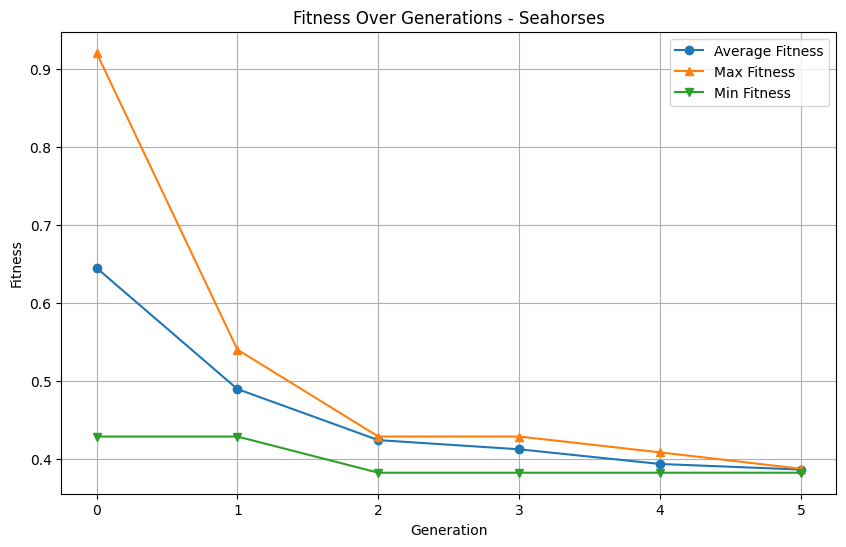

In [ ]:
# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_tourn_sh:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 0.38

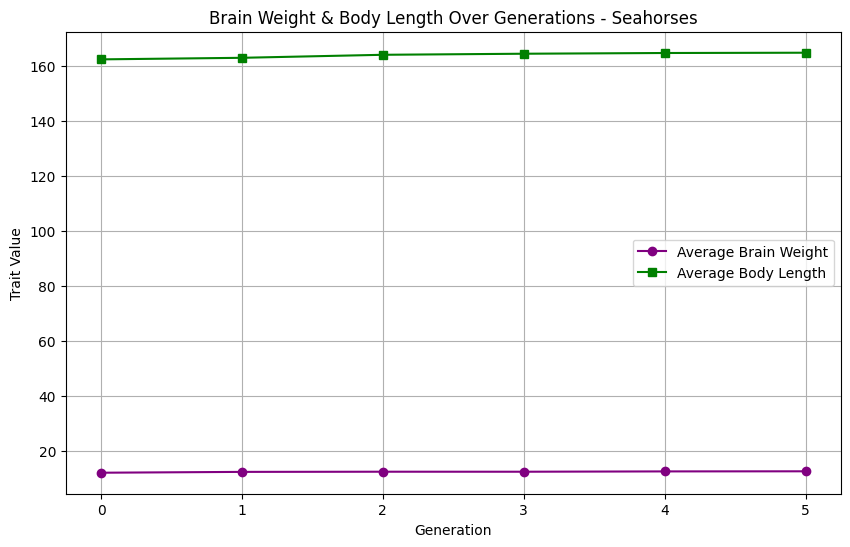

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_tourn_sh:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

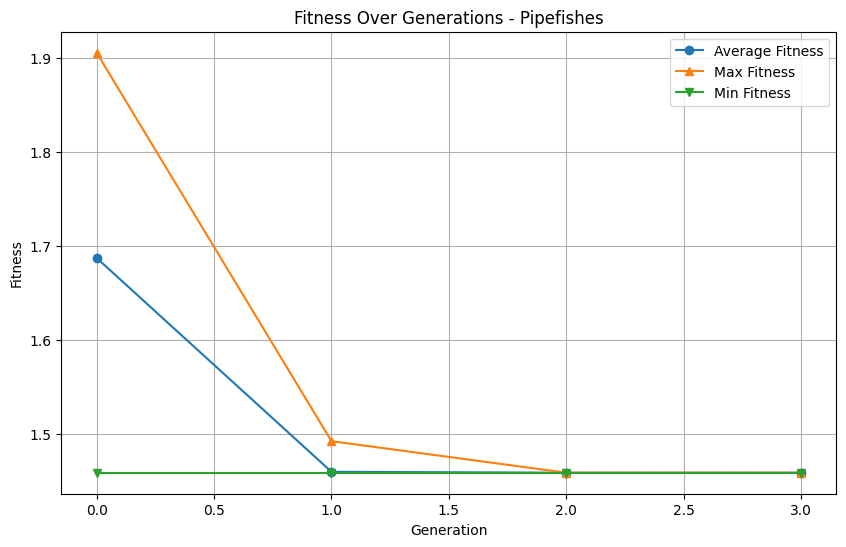

In [ ]:
# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_tourn_pf:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 1.44

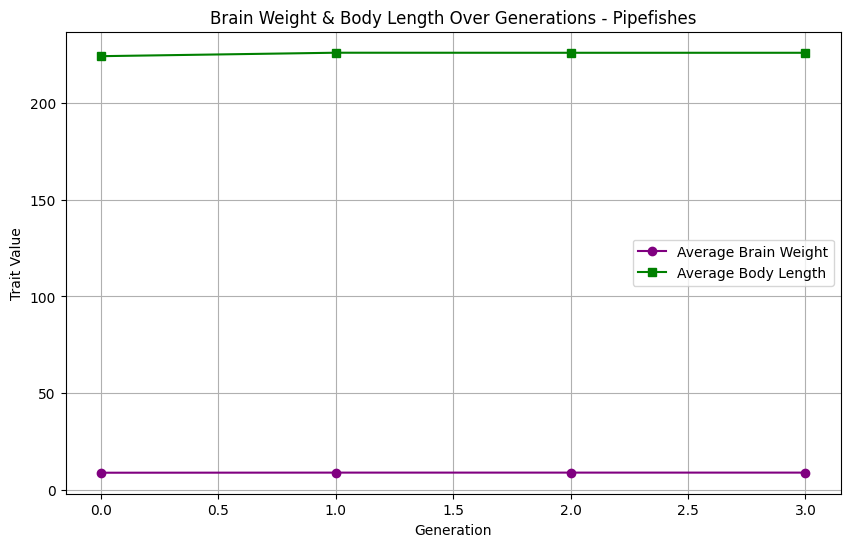

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_tourn_pf:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()

### Using only Boltzmann Selection

In [ ]:
generations_bolt_sh = ga_sh(encoded_seahorses_df, parent_selection="b", num_generations=10, num_survivors=35)


--- Generation 1 ---
Parents shape: (35, 8)
Recombination shape: (30, 3)
    Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
11          10.740000   166.000000            1  0.578070
26          10.740000   166.000000            1  0.578070
62          10.476740   163.291311            0  0.600744
61          11.103260   166.708689            1  0.612613
8           15.500000   165.000000            0  0.655230
4           15.500000   165.000000            0  0.655230
22          10.920000   167.000000            0  0.660070
54          10.920000   167.000000            0  0.660070
45          14.746799   157.382066            1  0.884627
50          12.873813   170.828834            0  0.947495
28           9.590000   155.000000            0  1.021070
56           9.140000   156.000000            1  1.026070
29           9.140000   156.000000            0  1.026070
57          19.303839   164.123902            0  1.070658
39           9.090000   170.000000            1  1.14307

In [ ]:
generations_bolt_pf = ga_pf(encoded_pipefishes_df, parent_selection="b", num_generations=15, num_survivors=150)


--- Generation 1 ---
Parents shape: (150, 8)
Recombination shape: (82, 3)
     Brain weight (mg)  Length (mm)  Sex_Encoded    Fitness
47            7.700000   221.000000            0   1.722071
25            6.100000   222.500000            1   1.822071
142          10.600000   208.000000            1   2.305800
120          12.400000   210.000000            1   2.405800
227           8.420949   200.000000            1   2.516962
..                 ...          ...          ...        ...
196          13.323602    94.325515            1  12.277738
224           2.334168    94.402497            0  12.470534
203           2.378295    93.675655            1  12.538805
28            2.400000    93.500000            0  12.554200
37            2.400000    93.500000            0  12.554200

[150 rows x 4 columns]

--- Generation 2 ---
Parents shape: (150, 4)
Recombination shape: (132, 3)
     Brain weight (mg)  Length (mm)  Sex_Encoded    Fitness
273          10.022384        200.0          

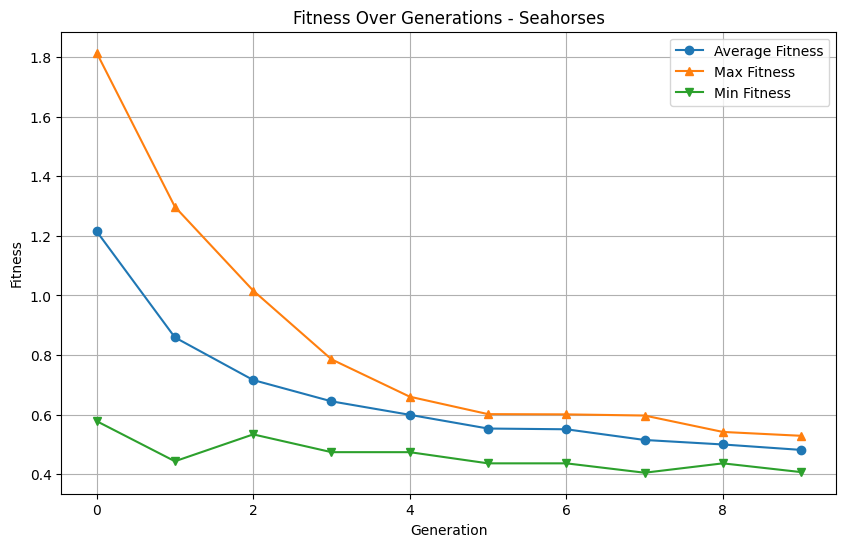

In [ ]:
# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_bolt_sh:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 0.45

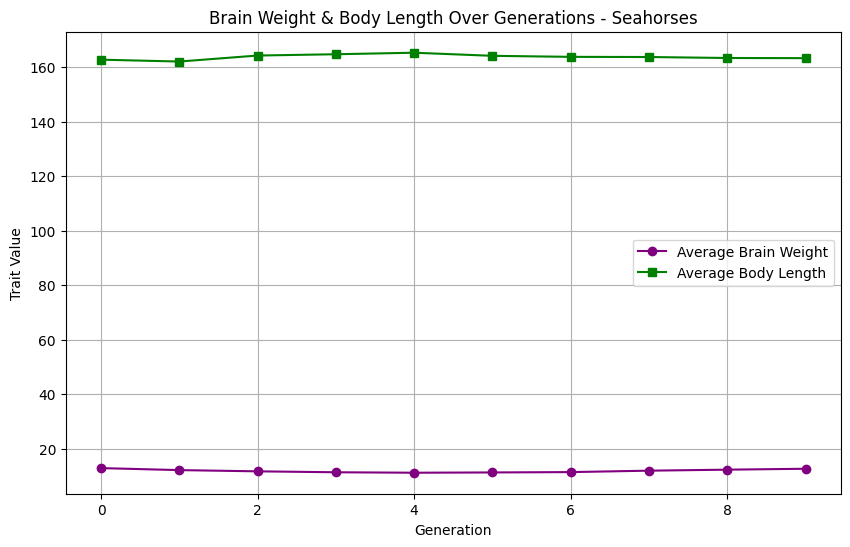

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_bolt_sh:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

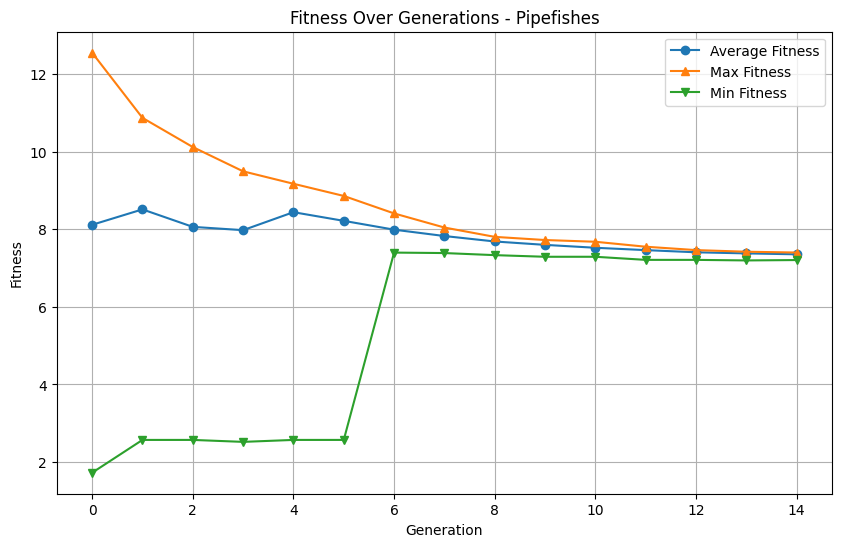

In [ ]:
# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_bolt_pf:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 7.3

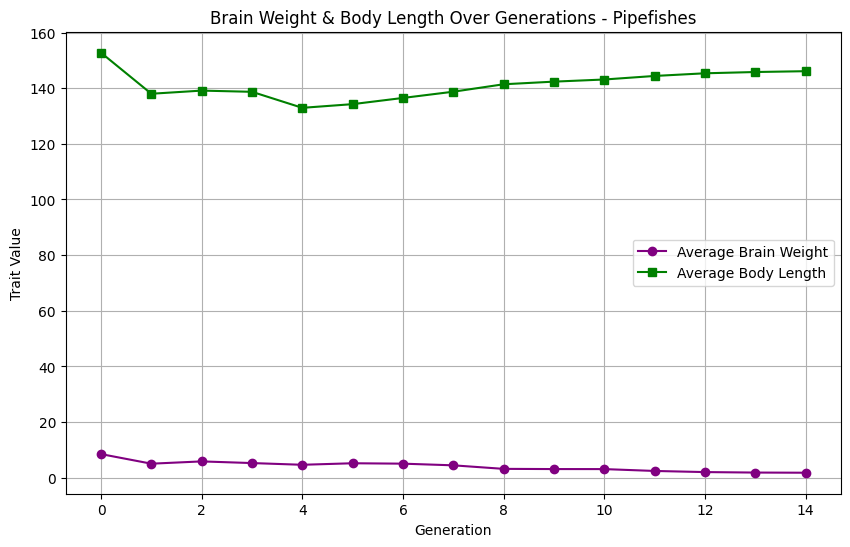

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_bolt_pf:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()

### Using Both Selections

In [ ]:
generations_both_sh = ga_sh(encoded_seahorses_df, parent_selection="both", num_generations=10, num_survivors=35)


--- Generation 1 ---
Parents shape: (35, 8)
Recombination shape: (28, 3)
    Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
15          12.360000   164.000000            1  0.428830
21          12.600000   162.000000            1  0.499230
27          12.600000   162.000000            1  0.499230
1           12.040000   162.000000            0  0.521630
44          12.186006   160.955109            1  0.557585
43          12.133994   160.044891            1  0.596075
5           10.790000   162.000000            0  0.621070
0           10.790000   162.000000            0  0.621070
40          14.998259   164.589410            0  0.621479
6           10.700000   162.000000            1  0.630070
22          10.700000   162.000000            1  0.630070
24          15.500000   165.000000            0  0.655230
33          15.500000   165.000000            0  0.655230
7           15.500000   165.000000            0  0.655230
9           15.500000   165.000000            0  0.65523

In [ ]:
generations_both_pf = ga_pf(encoded_pipefishes_df, parent_selection="both", num_generations=10, num_survivors=150)


--- Generation 1 ---
Parents shape: (150, 8)
Recombination shape: (132, 3)
     Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
73            9.500000   225.000000            0  1.515800
86            9.500000   225.000000            0  1.515800
143           9.500000   225.000000            0  1.515800
101           8.070000   223.000000            1  1.611000
2             9.950000   223.000000            1  1.640800
..                 ...          ...          ...       ...
237           6.248169   140.894486            1  7.429935
259           5.020145   142.083059            1  7.433880
9             6.230000   140.700000            0  7.451200
30            5.800000   140.100000            0  7.554200
71            5.800000   140.100000            0  7.554200

[150 rows x 4 columns]

--- Generation 2 ---
Parents shape: (150, 4)
Recombination shape: (92, 3)
     Brain weight (mg)  Length (mm)  Sex_Encoded   Fitness
4             9.500000        225.0          0.0  1.515800

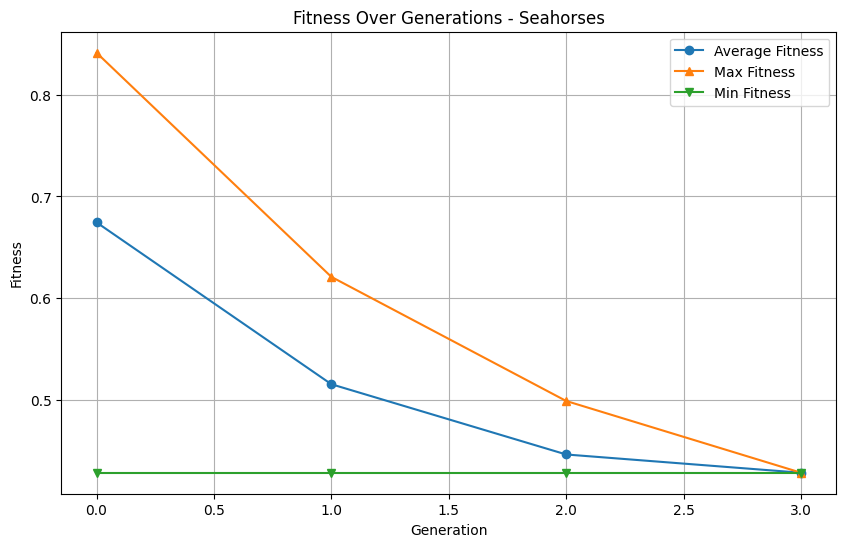

In [ ]:
# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_both_sh:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 0.42

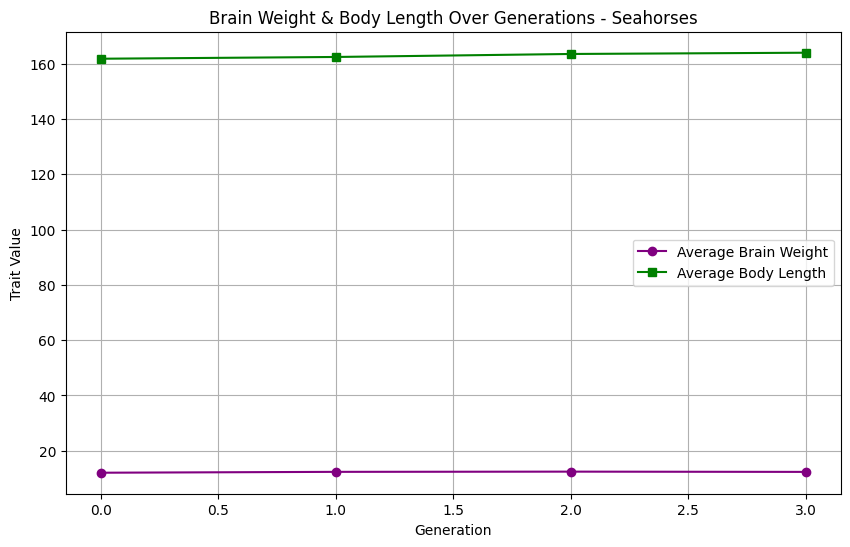

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_both_sh:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Seahorses")
plt.legend()
plt.grid(True)
plt.show()

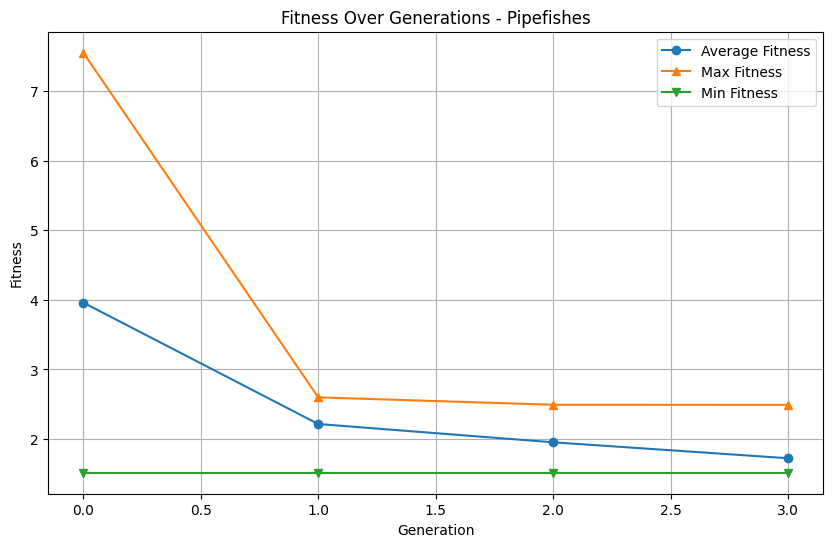

In [ ]:
import matplotlib.pyplot as plt

# Collect fitness stats
avg_fitness = []
max_fitness = []
min_fitness = []

for gen in generations_both_pf:
    fitness_values = gen["Fitness"]
    avg_fitness.append(fitness_values.mean())
    max_fitness.append(fitness_values.max())
    min_fitness.append(fitness_values.min())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label="Average Fitness", marker='o')
plt.plot(max_fitness, label="Max Fitness", marker='^')
plt.plot(min_fitness, label="Min Fitness", marker='v')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()

Fitness --> 1.7

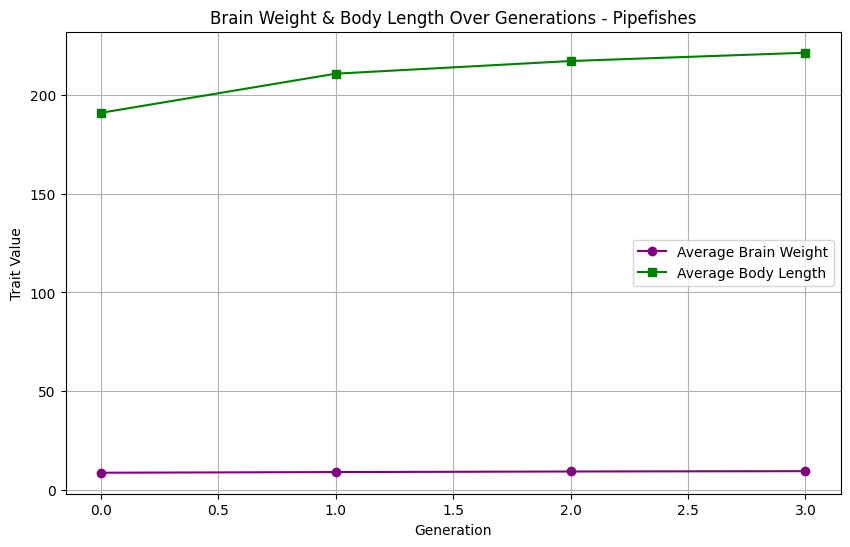

In [ ]:
brain_weight_avg = []
body_length_avg = []

for gen in generations_both_pf:
    brain_weight_avg.append(gen["Brain weight (mg)"].astype(float).mean())
    body_length_avg.append(gen["Length (mm)"].astype(float).mean())


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(brain_weight_avg, label="Average Brain Weight", marker='o', color='purple')
plt.plot(body_length_avg, label="Average Body Length", marker='s', color='green')
plt.xlabel("Generation")
plt.ylabel("Trait Value")
plt.title("Brain Weight & Body Length Over Generations - Pipefishes")
plt.legend()
plt.grid(True)
plt.show()